    ## ISYE 6740 - Assignment 2 - Classification

    #### As we explore exciting new developments in AI, I want to provide some guidance around using chatbots like ChatGPT for our class assignments. 

    #### The assignments are intended to develop your own skills and understanding. I encourage you to use ChatGPT liberally as a learning tool - discussing prompts and solutions with it can provide valuable insight into the problems. While ChatGPT can assist, make sure you are deeply engaged in working through the problems yourself. Take time to carefully review any suggestions from ChatGPT before submitting, and feel free to email me any prompts you find helpful. 

    #### While directly copying ChatGPT solutions into assignments is not prohibited, I advise using discretion and care when relying on its outputs. The goal is to leverage this technology to enhance your learning, but not replace the thinking required, as I believe you do not want to regret being unable to answer machine learning questions well in a job interview.

    ### Please leave the name of your teammate here if applicable.

In [ ]:
### Insert Name Here
Wenxin Jiang
Yihan Liao

### Q1) Linear SVM Classification


* In this question, we use the spam dataset to study linear SVM classifiers. For both training and testing data, the first 57 columns are different features of emails and the last column shows whether an email is spam (1 for spam). We will train linear SVM classifier models to predict if a given email is spam and explore how classification error changes with the parameter *C*.

* Please refer to the following package for Linear SVM classifier:\
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC

* Please standardize features in the dataset by removing the mean and scaling to unit variance. Refer to the following package for data standardization:\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* For your linear SVM model, set max_iter = $10^4$ and tol = 1e-2. Ignore the warnings of SVM.

#### a) Standardize the training set.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the SPAM_train dataset
spam_train = pd.read_csv('SPAM_train.csv')

# Separate features and labels
X_train = spam_train.iloc[:, :-1]  # First 57 columns (features)
y_train = spam_train.iloc[:, -1]   # Last column (target)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# X_train_standardized is now standardized

#### b) Train SVM classifiers for a range of *C* values $\{10^{-5}, 10^{-4}, 10^{-3}, \ldots, 10^{1}, 10^{2}\}$ using the standardized training set. 

In [2]:
from sklearn.svm import LinearSVC
import numpy as np

# Define the range of C values
C_values = [10**i for i in range(-5, 3)]  # {10^-5, 10^-4, ..., 10^1, 10^2}

# Train SVM classifiers for each value of C
for C in C_values:
    # Initialize LinearSVC with specified max_iter and tol parameters
    svm = LinearSVC(C=C, max_iter=10**4, tol=1e-2)
    
    # Train the model with the standardized training set
    svm.fit(X_train_standardized, y_train)

/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### c) Standardize the testing set using the statistics of the training set obtained in a).

In [3]:
# Load the SPAM_test dataset
spam_test = pd.read_csv('SPAM_test.csv')

# Separate features and labels
X_test = spam_test.iloc[:, :-1]  # First 57 columns (features)
y_test = spam_test.iloc[:, -1]   # Last column (target)

# Standardize features in the testing set using the fitted scaler from training set
X_test_standardized = scaler.transform(X_test)

# X_test_standardized is now standardized using training set statistics

#### d) Plot misclassification errors on the standardized testing set with respect to different $C$ values. 

/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


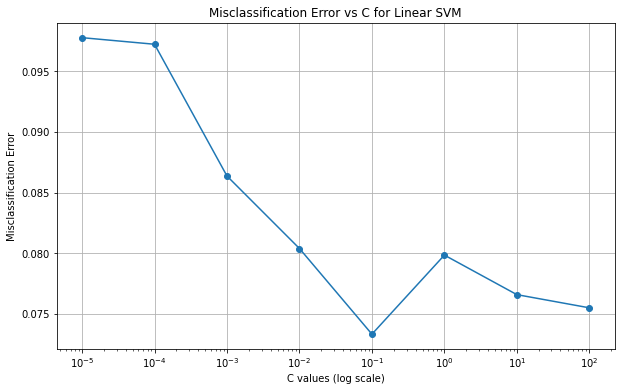

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load the SPAM_test dataset
spam_test = pd.read_csv('SPAM_test.csv')

# Separate features and labels for the testing set
X_test = spam_test.iloc[:, :-1]  # First 57 columns (features)
y_test = spam_test.iloc[:, -1]   # Last column (target)

# Standardize the testing set using the same scaler fitted on the training data
X_test_standardized = scaler.transform(X_test)

# Define the range of C values
C_values = [10**i for i in range(-5, 3)]  # {10^-5, 10^-4, ..., 10^2}

# Train SVM classifiers for different C values and store the misclassification errors
misclassification_errors = []

for C in C_values:
    # Train the Linear SVM classifier
    svm = LinearSVC(C=C, max_iter=10**4, tol=1e-2)
    svm.fit(X_train_standardized, y_train)

    # Predict on the standardized testing set
    y_pred = svm.predict(X_test_standardized)

    # Calculate misclassification error
    misclassification_error = 1 - accuracy_score(y_test, y_pred)
    misclassification_errors.append(misclassification_error)

# Plot misclassification errors with respect to C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, misclassification_errors, marker='o')
plt.xscale('log')
plt.xlabel('C values (log scale)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs C for Linear SVM')
plt.grid(True)
plt.show()

#### e) Report the optimal parameter $C^*$ and its misclassifcation error. 

In [5]:
# Find the index of the minimum misclassification error
optimal_index = np.argmin(misclassification_errors)

# Get the optimal C and its corresponding misclassification error
C_star = C_values[optimal_index]
min_misclassification_error = misclassification_errors[optimal_index]

print(f'Optimal parameter C*: {C_star}')
print(f'Misclassification error for C*: {min_misclassification_error:.4f}')

Optimal parameter C*: 0.1
Misclassification error for C*: 0.0733


#### f) With the optimal parameter $C^*$ obtained in e), which training data points are support vectors? Can you visualize your results using a histogram?

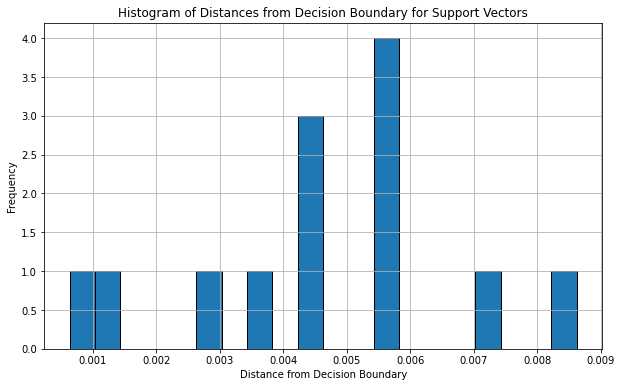

Indices of support vectors: [  56  134  234  340 1087 1199 1392 1452 1584 1958 2072 2368 2597]


In [6]:
# Train LinearSVC with the optimal C*
svm_optimal = LinearSVC(C=C_star, max_iter=10**4, tol=1e-2)
svm_optimal.fit(X_train_standardized, y_train)

# Calculate the decision function values for the training set
decision_function_values = svm_optimal.decision_function(X_train_standardized)

# Find indices of training data points that are close to the decision boundary (acting as support vectors)
# Here, we consider points that have a decision value close to 0 as support vectors
support_vector_indices = np.where(np.abs(decision_function_values) < 1e-2)[0]

# Visualize the distances of support vectors using a histogram
plt.figure(figsize=(10, 6))
plt.hist(np.abs(decision_function_values[support_vector_indices]), bins=20, edgecolor='k')
plt.xlabel('Distance from Decision Boundary')
plt.ylabel('Frequency')
plt.title('Histogram of Distances from Decision Boundary for Support Vectors')
plt.grid(True)
plt.show()

# Print the indices of the support vectors
print(f'Indices of support vectors: {support_vector_indices}')

#### g) How does C affect the bias and variance of your classifier?

In [ ]:
#### High C
#- Low Bias, High Variance. A larger C makes the model focus heavily on correctly classifying the training data.
#- tend to overfit and over sensitive to the noises in the training data.
#### Low C
#- High Bias, Low Variance: A smaller C leads to a more generalized decision boundary.
#- tend to underfit and fail to capture the complex trend in the training data

### Q2) Regularized Logistic Regression

* We will train regularized logistic regression models on the same spam dataset and explore how the regularization parameter changes the classification error on the testing set.

* Please refer to the following package for Logistic Regression:\
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* Note that the scikit-learn package solves $\min_\theta CL(\theta)+\frac{1}{2}\|\theta\|_2^2$, where $L(\theta)$ is the logistic loss function and $C$ is the tuning parmaeter. $C$ is different from $\lambda$ we learnt in class. 

#### a) Train Logistic regression models for a range of *C* values $\{10^{-5}, 10^{-4}, 10^{-3}, \ldots, 10^{1}, 10^{2}\}$ using the standardized training set.

In [7]:
from sklearn.linear_model import LogisticRegression

# Define the range of C values (as in SVM)
C_values = [10**i for i in range(-5, 3)]  # {10^-5, 10^-4, ..., 10^2}

# Train Logistic Regression models for different C values
logistic_models = []

for C in C_values:
    # Train the logistic regression model
    logistic = LogisticRegression(C=C, solver='lbfgs', max_iter=10000)
    logistic.fit(X_train_standardized, y_train)

    # Store the trained model
    logistic_models.append(logistic)

#### b) Plot misclassification errors on the standardized testing set with respect to different *C* values. 

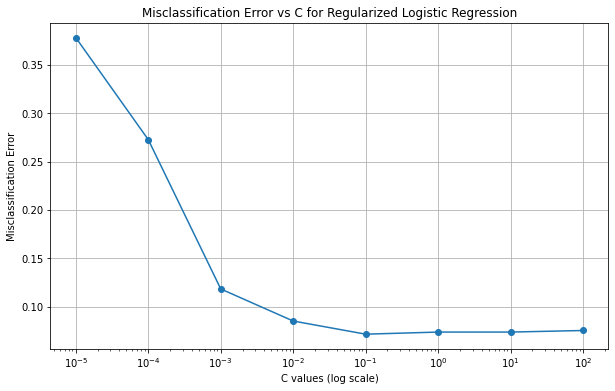

In [8]:
from sklearn.metrics import accuracy_score

# Calculate the misclassification errors for each value of C
misclassification_errors_logistic = []

for logistic in logistic_models:
    # Predict on the standardized testing set
    y_pred = logistic.predict(X_test_standardized)

    # Calculate misclassification error
    misclassification_error = 1 - accuracy_score(y_test, y_pred)
    misclassification_errors_logistic.append(misclassification_error)

# Plot misclassification errors with respect to C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, misclassification_errors_logistic, marker='o')
plt.xscale('log')
plt.xlabel('C values (log scale)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs C for Regularized Logistic Regression')
plt.grid(True)
plt.show()

#### c) Report the optimal parameter *C* and its misclassifcation error. 

In [19]:
# Find the index of the minimum misclassification error
optimal_index_logistic = np.argmin(misclassification_errors_logistic)

# Get the optimal C and its corresponding misclassification error
C_star_logistic = C_values[optimal_index_logistic]
min_misclassification_error_logistic = misclassification_errors_logistic[optimal_index_logistic]

print(f'Optimal parameter C*: {C_star_logistic}')
print(f'Misclassification error for C*: {min_misclassification_error_logistic:.4f}')

Optimal parameter C*: 0.1
Misclassification error for C*: 0.0717


#### d) How does the classificaiton error of regularized logistic regression compare with that of support vector machine? Is there a big difference? Why?

In [9]:
'''There is no big difference between the misclassification errors of both models (0.0733 and 0.0717). 
It could be because the dataset is linearly separable, and both logistic regression 
and linear SVM are suited for such data.'''

'There is no big difference between the misclassification errors of both models (0.0733 and 0.0717). \nIt could be because the dataset is linearly separable, and both logistic regression \nand linear SVM are suited for such data.'

## For quetion 3 to 5, please use pycasso package.

* Please refer to the following package for pycasso:\
https://hmjianggatech.github.io/picasso/


* We will train some models via pycasso and explore how the Lambda (the parameter of controling regularization) value changes the prediction error on the testing set.

* You can choose the type of models by specifying "family" and "penalty" in the solver. The solver has the attribute "lambdas" that can return calculated lambdas. 

*  You need to set lambdas = (N, r) in the solver so that N lambdas will be calculated and lambda_min_ratio = r. 


### Q3) Lasso Regression 

#### a) Standardize the training set.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pycasso
import numpy as np

train = pd.read_csv('Question3_train.csv')
test = pd.read_csv('Question3_test.csv')
X = train.drop(columns=['target'])
y = train['target']

scaler = StandardScaler()
X_train = scaler.fit_transform(X)
# Convert to numpy arrays as required by Pycasso
X_train = np.array(X_train)
y_train = np.array(y)

#### b) Fit the training set for Question 3 using a Lasso model via pycasso.  Please set lambdas=(100, 0.02) in the solver. 

In [3]:
from pycasso import Solver
# Initialize the Lasso model with the desired parameters
lasso_solver = Solver(
    x=X_train,
    y=y_train,
    lambdas=(100, 0.02),  # Specified lambdas
    family='gaussian',    # Linear regression
    penalty='l1',         # Lasso penalty
    useintercept=False,   # No intercept as default
    max_ite=1000,         # Maximum number of iterations
    verbose=True          # Enable verbose output
)

# Train the model
lasso_solver.train()

Sparse linear regression.
L1regularization via active set identification and coordinate descent. 

Training is over.


#### c) Standardize the testing set using the statistics of the training set obtained in a).

In [4]:
X_test = test.drop(columns=['target'])   
X_test = scaler.transform(X_test)
X_test = np.array(X_test)
y_test = test['target'].to_numpy()

#### d) Plot the prediction error (use MSE as evaluation metric) on the standardized testing set vs. the Lambda parameter. Report the optimal parameter and its prediction error. 

In [5]:
from sklearn.metrics import mean_squared_error
coefficients = lasso_solver.coef()
beta = coefficients['beta']  

lambdas = lasso_solver.lambdas
# Assume X_test is standardized and y_test is defined
mse_errors = []

# Iterate over each lambda index
for lambdidx in range(100):  # Adjust range if different number of lambdas
    # Predict with the current lambda index
    predictions = lasso_solver.predict(newdata=X_test, lambdidx=lambdidx)
    
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    mse_errors.append(mse)
    
# Find the optimal lambda based on minimum MSE
optimal_lambda_idx = np.argmin(mse_errors)
optimal_lambda = lambdas[optimal_lambda_idx]
optimal_mse = mse_errors[optimal_lambda_idx]

print(f"Optimal Lambda: {optimal_lambda}")
print(f"Minimum MSE: {optimal_mse}")

Optimal Lambda: 2.433371755362587
Minimum MSE: 3191.6960187522136


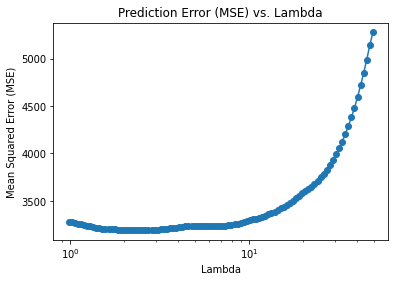

In [6]:
import matplotlib.pyplot as plt

# Plotting MSE vs. Lambda
plt.plot(lambdas, mse_errors, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Prediction Error (MSE) vs. Lambda')
plt.xscale('log')  # Lambda values are typically plotted on a log scale
plt.show()

#### e) How many variables does the optimal parameter select?

In [7]:
# Further, to count the number of variables selected for the optimal lambda
optimal_coefficients = lasso_solver.coef()['beta'][optimal_lambda_idx]
selected_variables = np.where(optimal_coefficients != 0)
num_selected_variables = np.count_nonzero(selected_variables)
print(f"Number of variables selected by the model with optimal lambda ({optimal_lambda}): {num_selected_variables}")
selected_variables

Number of variables selected by the model with optimal lambda (2.433371755362587): 18


(array([ 1,  2,  3,  4,  6,  8, 10, 11, 12, 18, 19, 21, 23, 27, 28, 32, 36,
        45]),)

#### f) Train a linear regression model (without any regularization) using only the variables selected in e). Report the prediction error on the standardized testing set.

In [8]:
selected_features = selected_variables[0]
from sklearn.linear_model import LinearRegression
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train a linear regression model on the selected variables
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# Predict and calculate the MSE on the standardized testing set
predictions = linear_model.predict(X_test_selected)
mse_selected_features = mean_squared_error(y_test, predictions)

print(f"Prediction Error (MSE) on the testing set using selected features: {mse_selected_features}")

Prediction Error (MSE) on the testing set using selected features: 3286.337866330763


#### g) How does the prediction error in f) compare with the prediction error in d)? Why?

In part (d), the minimum MSE from the Lasso model with regularization was 3191.70. In part (f), MSE is obtained from linear regression model using only selected features from the Lasso model. MSE from part (d) is lower. This difference likely occurs because the Lasso model includes a regularization term, which helps reduce overfitting by penalizing the complexity of the model. When using only the selected variables but without regularization, the linear regression model may capture more noise in the data, leading to a slightly higher prediction error.

Regularization in Lasso can improve generalization by preventing the model from relying too heavily on specific features, especially if they are correlated or noisy. Without regularization, the model in part (f) has the potential to overfit on those selected features, resulting in a slightly higher error on the test set.

#### h) How does the regularization parameter affect bias and variance.

In the MSE vs Lambda plot, it shows an increase in prediction error (MSE) as 
λ increases, suggesting that high regularization leads to underfitting. As a result, the model becomes simpler, which increases bias but decreases variance. This is because the model relies less on specific features and is less sensitive to fluctuations in the training data.


#### i) Plot out the regularization path (coefficient vs regularization parameter lambda).

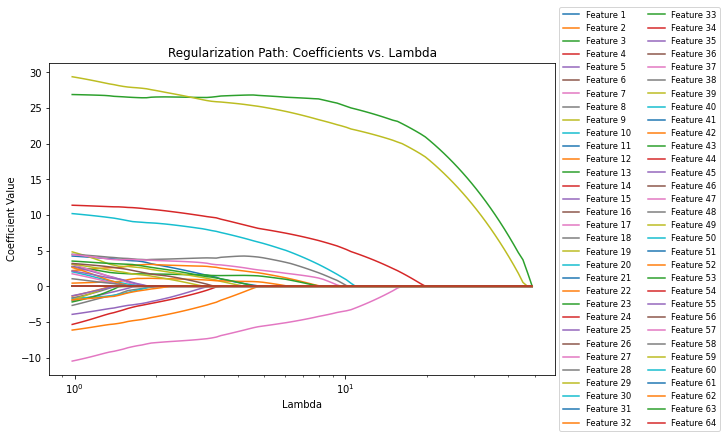

In [9]:
# Get the coefficient paths for each lambda
coefficients_path = np.array(lasso_solver.coef()['beta'])

# Plot the regularization path
plt.figure(figsize=(12, 6))
for i in range(coefficients_path.shape[1]):
    plt.plot(lambdas, coefficients_path[:, i], label=f'Feature {i+1}')

# Set logarithmic scale for lambda axis
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Regularization Path: Coefficients vs. Lambda')

# Move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)  # Adjust ncol as needed for better readability

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()

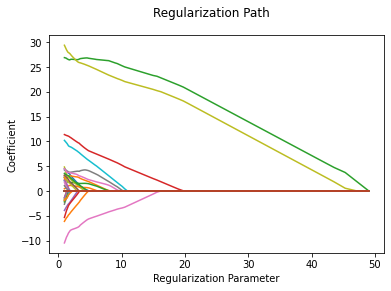

In [11]:
lasso_solver.plot()

#### j) Based on the regularization path, please list the most important 5 variables.

In [13]:
coefficients_path = np.array(lasso_solver.coef()['beta'])
feature_names = X.columns

# Calculate the number of non-zero coefficients for each variable as we move down in lambda
non_zero_counts = np.sum(coefficients_path != 0, axis=0)

# Get the indices of the 5 most persistent variables (those with the most non-zero counts)
important_features_indices = np.argsort(non_zero_counts)[-5:][::-1]

# Print the most important variables and their persistence counts
print("Most important 5 variables based on the regularization path:")
for rank, idx in enumerate(important_features_indices, start=1):
    feature_name = feature_names[idx]
    persistence_count = non_zero_counts[idx]
    print(f"{rank}. Feature {feature_name} (Index {idx}) with non-zero coefficient count: {persistence_count}")

Most important 5 variables based on the regularization path:
1. Feature bmi (Index 2) with non-zero coefficient count: 99
2. Feature ltg (Index 8) with non-zero coefficient count: 98
3. Feature map (Index 3) with non-zero coefficient count: 77
4. Feature hdl (Index 6) with non-zero coefficient count: 71
5. Feature age:sex (Index 19) with non-zero coefficient count: 61


### Q4) Logistic Lasso Regression 

#### a) Fit the spam dataset using a Logistic Lasso model via pycasso (You need to follow the same standardization procedure as in Q1). Please set lambdas=(100, 0.05) in the solver. 

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the SPAM_train dataset
spam_train = pd.read_csv('SPAM_train.csv')
spam_test = pd.read_csv('SPAM_test.csv')

# Separate features and labels
X_train = spam_train.iloc[:, :-1]  # First 57 columns (features)
y_train = spam_train.iloc[:, -1]   # Last column (target)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Separate features and labels
X_test = spam_test.iloc[:, :-1]  # First 57 columns (features)
y_test = spam_test.iloc[:, -1]   # Last column (target)

# Standardize features in the testing set using the fitted scaler from training set
X_test_standardized = scaler.transform(X_test)

In [77]:
log_lasso = Solver(
    x=X_train_standardized,
    y=y_train,
    lambdas=(100, 0.05),  # Specified lambdas
    family='binomial',    # Set to "binomial" for logistic regression
    penalty='l1',         # Lasso penalty
)

# Train the model
log_lasso.train()

Training is over.


#### b) Plot the misclassification error on the standardize testing set vs. the Lambda parameter. Report the optimal parameter and its misclassifcation error. 

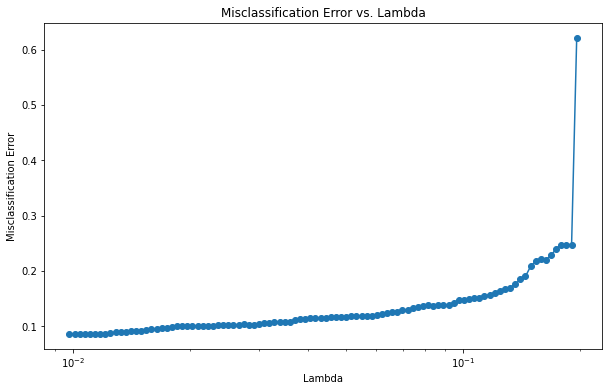

Optimal Lambda: 0.011389197997957866
Misclassification Error at Optimal Lambda: 0.08582292232482347


In [78]:
from scipy.special import expit  # Sigmoid function
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store lambda values and misclassification errors
lambdas = log_lasso.lambdas
mce_log_lasso = []

# Loop over each lambda and calculate the misclassification error
for idx, lambd in enumerate(log_lasso.lambdas):
    # Get predictions using the model for the current lambda index
    y_pred_raw = log_lasso.predict(newdata=X_test_standardized, lambdidx=idx)
    
    # Apply sigmoid transformation to get probabilities
    y_pred_prob = expit(y_pred_raw)
    
    # Convert probabilities to binary outcomes (0 or 1) using a 0.5 threshold
    y_pred_binary = (y_pred_prob >= 0.5).astype(int)
    
    # Calculate misclassification error
    error = 1 - accuracy_score(y_test, y_pred_binary)
    mce_log_lasso.append(error)

# Plot misclassification error vs lambda
plt.figure(figsize=(10, 6))
plt.plot(log_lasso.lambdas, mce_log_lasso, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Lambda')
plt.xscale('log')  # Log scale for lambda
plt.show()

# Find the optimal lambda (with the smallest misclassification error)
optimal_lambda_idx = np.argmin(mce_log_lasso)
optimal_lambda = log_lasso.lambdas[optimal_lambda_idx]
optimal_error = mce_log_lasso[optimal_lambda_idx]
print(f"Optimal Lambda: {optimal_lambda}")
print(f"Misclassification Error at Optimal Lambda: {optimal_error}")

#### c) How many variables does the optimal parameter select?

In [79]:
# Further, to count the number of variables selected for the optimal lambda
optimal_coefficients = log_lasso.coef()['beta'][optimal_lambda_idx]
selected_variables = np.where(optimal_coefficients != 0)
num_selected_variables = np.count_nonzero(selected_variables)
print(f"Number of variables selected by the model with optimal lambda ({optimal_lambda}): {num_selected_variables}")
selected_variables

Number of variables selected by the model with optimal lambda (0.011389197997957866): 34


(array([ 2,  4,  5,  6,  7,  8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 32, 36, 38, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 55, 56]),)

#### d) Train a logistic regression model (without any regularization) using only the variables selected in e). Report the prediction error on the standardized testing set.

In [82]:
from sklearn.linear_model import LogisticRegression

selected_features = selected_variables[0]  # Unpack the tuple
X_train_selected = X_train_standardized[:, selected_features]
X_test_selected = X_test_standardized[:, selected_features]

# Initialize a logistic regression model without regularization
logistic_model = LogisticRegression(penalty='none', max_iter=1000)

# Train the model on the training set with the selected features
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_selected)

# Calculate the misclassification error on the testing set
accuracy = accuracy_score(y_test, y_pred)
misclassification_error = 1 - accuracy

print(f"Prediction Error (Misclassification Error) on the testing set using selected features: {misclassification_error}")
print(f"Accuracy on the testing set using selected features: {accuracy}")

Prediction Error (Misclassification Error) on the testing set using selected features: 0.08093427485062465
Accuracy on the testing set using selected features: 0.9190657251493753


#### e) How does the prediction error in d) compare with the prediction error in b)? Why?

The prediction error in part (d) is 0.0809, which is slightly lower than the misclassification error in part (b) of 0.0858 for the Logistic Lasso model. This improvement is likely because the logistic regression model in (d) uses only the selected features without regularization, allowing it to fully fit the data without penalizing any coefficients. In contrast, the Lasso model in (b) penalizes feature coefficients, introducing some bias to control overfitting, which may result in a slightly higher error.

#### f) How does the regularization  parameter affect bias and variance.

The regularization parameter (lambda) controls bias-variance trade-off: higher lambda increases bias by shrinking more coefficients to zero, simplifying the model and reducing overfitting, but leading to underfitting, as seen with higher misclassification error at large lambda values in the output. Lower lambda reduces bias by allowing more features, but increases variance by making the model more sensitive to noise. The optimal lambda of 0.0114 achieves the lowest misclassification error, indicating a balance between bias and variance.

#### g) Plot out the regularization path (coefficient vs regularization parameter lambda).

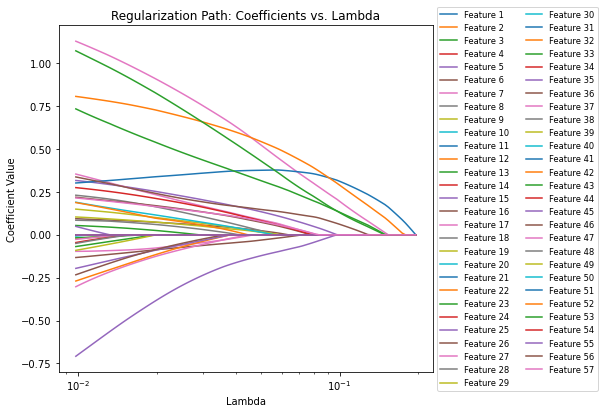

In [46]:
coefficients_path = np.array(log_lasso.coef()['beta'])

# Plot the regularization path
plt.figure(figsize=(10, 6))
for i in range(coefficients_path.shape[1]):
    plt.plot(lambdas, coefficients_path[:, i], label=f'Feature {i+1}')

# Set the x-axis to logarithmic scale for lambda
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Regularization Path: Coefficients vs. Lambda')

# Place legend outside the plot area to prevent overlapping
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()

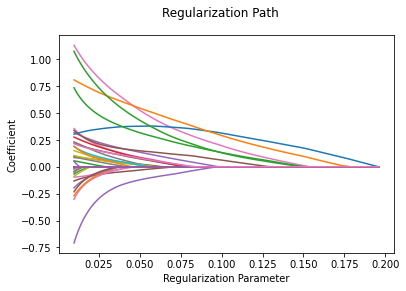

In [47]:
log_lasso.plot()

### Q5) Logistic MCP Regression

#### a) Fit the provided spam dataset using a Logistic model with MCP regularization via pycasso (You need to follow the same standardization procedure as in Q1).  Please set lambdas=(100, 0.05) and gamma=1.25. 

In [85]:
# Separate features and labels
X_train = spam_train.iloc[:, :-1]  # First 57 columns (features)
y_train = spam_train.iloc[:, -1]   # Last column (target)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Separate features and labels
X_test = spam_test.iloc[:, :-1]  # First 57 columns (features)
y_test = spam_test.iloc[:, -1]   # Last column (target)

# Standardize features in the testing set using the fitted scaler from training set
X_test_standardized = scaler.transform(X_test)

In [86]:
log_mcp = Solver(
    x=X_train_standardized,
    y=y_train.values,       # Convert y_train to numpy array if it isn't already
    lambdas=(100, 0.05),    # Range of lambda values
    family='binomial',      # Logistic regression for classification
    penalty='mcp',          # MCP regularization
    gamma=1.25,             # Gamma parameter for MCP
    useintercept=False,     # No intercept by default, adjust if needed
    max_ite=1000,           # Maximum number of iterations
    verbose=True            # Enable verbose output to monitor fitting
)

# Train the MCP regularized logistic regression model
log_mcp.train()

Sparse logistic regression. 

MCPregularization via active set identification and coordinate descent. 

Training is over.


#### b) Plot the misclassification error on the testing set vs. the Lambda parameter. Report the optimal parameter and its misclassifcation error.

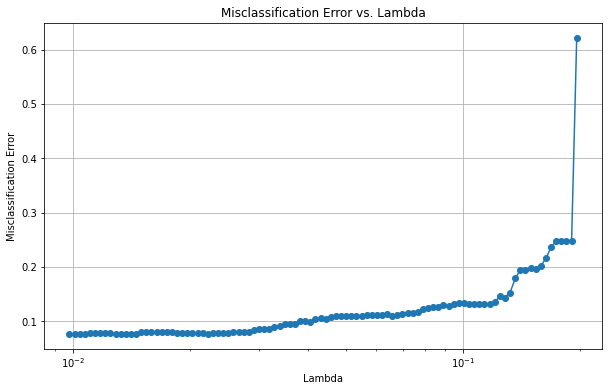

Optimal Lambda: 0.013249568315423899
Misclassification Error at Optimal Lambda: 0.07658881042911458


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.special import expit  # Import sigmoid function

# Retrieve lambda values from the model
lambdas = log_mcp.lambdas
mce_log_mcp = []

# Loop over each lambda and calculate the misclassification error
for idx, lambd in enumerate(lambdas):
    # Get predictions in log-odds form for the current lambda index
    y_pred_log_odds = log_mcp.predict(newdata=X_test_standardized, lambdidx=idx)
    
    # Apply sigmoid to convert log-odds to probabilities
    y_pred_prob = expit(y_pred_log_odds)
    
    # Convert probabilities to binary outcomes (0 or 1) using a 0.5 threshold
    y_pred_binary = (y_pred_prob >= 0.5).astype(int)
    
    # Calculate misclassification error as 1 - accuracy
    error = 1 - accuracy_score(y_test, y_pred_binary)
    mce_log_mcp.append(error)

# Plot misclassification error vs lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, mce_log_mcp, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Lambda')
plt.xscale('log')  # Log scale for lambda
plt.grid(True)
plt.show()

# Find the optimal lambda (with the smallest misclassification error)
optimal_lambda_idx = np.argmin(mce_log_mcp)
optimal_lambda = lambdas[optimal_lambda_idx]
optimal_error = mce_log_mcp[optimal_lambda_idx]

print(f"Optimal Lambda: {optimal_lambda}")
print(f"Misclassification Error at Optimal Lambda: {optimal_error}")

#### c) How many variables does the optimal parameter select?

In [88]:
# Get the coefficients at the optimal lambda index
optimal_coefficients = log_mcp.coef()['beta'][optimal_lambda_idx]

# Count the number of non-zero coefficients, which indicate selected variables
num_selected_variables = np.sum(optimal_coefficients != 0)

print(f"Number of variables selected by the model with optimal lambda ({optimal_lambda}): {num_selected_variables}")

Number of variables selected by the model with optimal lambda (0.013249568315423899): 31


In [65]:
optimal_coefficients

array([ 0.        ,  0.        ,  0.08275603,  0.        ,  0.39797028,
        0.16342171,  1.74864235,  0.33325719,  0.27709972,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.49821265,  0.72983923,  0.08842231,  0.16648671,  0.69809274,
        0.23483738,  0.52927425,  1.6406306 ,  0.38546147, -1.69047095,
       -0.24019275, -1.68810604,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.26328168,  0.        ,  0.        ,
        0.        , -0.09253218,  0.        ,  0.        ,  0.        ,
        0.        , -0.73066564,  0.        , -0.45755545, -0.46704664,
       -0.66604461, -0.10344464, -0.39954147, -0.36251005,  0.        ,
        0.        ,  0.93834687,  1.68042601,  0.        ,  0.        ,
        0.66977442,  0.32132612])

#### d) Plot out the regularization path (coefficient vs regularization parameter lambda)

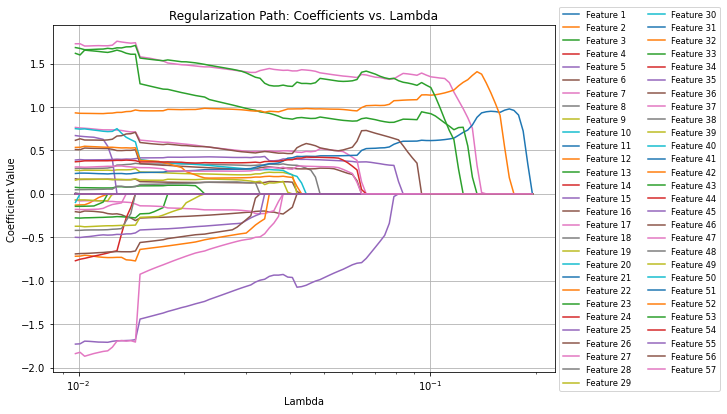

In [60]:
import matplotlib.pyplot as plt

# Extract the coefficients path for each lambda
coefficients_path = np.array(log_mcp.coef()['beta'])
lambdas = log_mcp.lambdas

# Plot the regularization path for each feature
plt.figure(figsize=(12, 6))
for i in range(coefficients_path.shape[1]):
    plt.plot(lambdas, coefficients_path[:, i], label=f'Feature {i+1}')

# Set the x-axis to a logarithmic scale for lambda
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Regularization Path: Coefficients vs. Lambda')

# Place the legend outside the plot to avoid cluttering
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.grid(True)
plt.show()


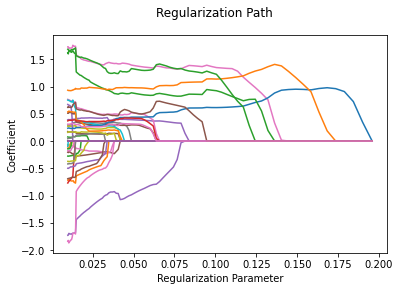

In [61]:
log_mcp.plot()

#### e) Plot the misclassification error vs. the number of nonzero entries in the logistic regression coefficient using MCP vs Lasso in Q4 and Q5 by varying the regularizaiton parameter. What do you observe? Why?

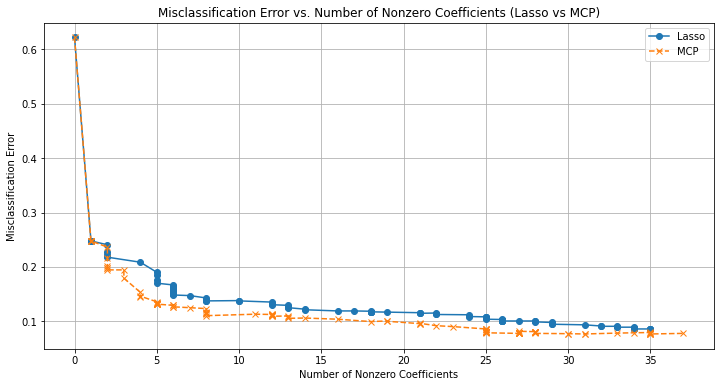

In [62]:
lasso_nonzero_entries = []
lasso_misclassification_errors = []
MCP_non_zero_entries = []
MCP_misclassification_errors = []

for idx, lambda_ in enumerate(lambdas):
    lasso_nonzero_entries.append(np.sum(log_lasso.coef()['beta'][idx] != 0))
    MCP_non_zero_entries.append(np.sum(log_mcp.coef()['beta'][idx] != 0))
    
    # Use idx to access the list elements
    lasso_misclassification_errors.append(mce_log_lasso[idx])
    MCP_misclassification_errors.append(mce_log_mcp[idx])

plt.figure(figsize=(12, 6))
plt.plot(lasso_nonzero_entries, lasso_misclassification_errors, label='Lasso', marker='o', linestyle='-')
plt.plot(MCP_non_zero_entries, MCP_misclassification_errors, label='MCP', marker='x', linestyle='--')
plt.xlabel('Number of Nonzero Coefficients')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Number of Nonzero Coefficients (Lasso vs MCP)')
plt.legend()
plt.grid()
plt.show()

### Q6) K-Fold Cross Validation

* Similar to Q1,  we will use the spam dataset to train linear SVM Classifiers using K-Fold cross validation to optimize C. Ignore the warnings of SVM. 

* Data need to be standardized as the way you did in Q1.

* Please refer to the following package for K-Fold cross validation:\
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

* For your linear SVM model, set max_iter = $10^4$ and tol = 1e-2. Ignore the warnings of SVM.

#### a) Please find an optimal C for a range of *C* values $\{10^{-5}, 10^{-4}, 10^{-3}, \ldots, 10^{1}, 10^{2}\}$ under different values of K = [2, 3, 5, 7, 10]. 

In [7]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Define the range of C values
C_values = [10**i for i in range(-5, 3)]  # {10^-5, 10^-4, ..., 10^2}
K_values = [2, 3, 5, 7, 10]

# Dictionary to store the optimal C for each K
optimal_C_for_each_K = {}

for K in K_values:
    # Set up K-Fold Cross Validation
    kfold = KFold(n_splits=K, shuffle=True, random_state=42)
    
    # List to store mean cross-validation scores for each value of C
    mean_scores = []

    for C in C_values:
        # Initialize the Linear SVM with specified parameters
        svm = LinearSVC(C=C, max_iter=10**4, tol=1e-2)

        # Perform cross-validation
        scores = cross_val_score(svm, X_train_standardized, y_train, cv=kfold, scoring='accuracy')

        # Calculate the mean score across all folds
        mean_scores.append(np.mean(scores))
    
    # Find the value of C with the highest mean cross-validation score
    optimal_index = np.argmax(mean_scores)
    optimal_C = C_values[optimal_index]
    optimal_C_for_each_K[K] = (optimal_C, mean_scores[optimal_index])

    print(f'For K={K}, optimal C*: {optimal_C} with mean cross-validation accuracy: {mean_scores[optimal_index]:.4f}')

# Print all optimal C values for different K
print("\nOptimal C values for each K:")
for K, (C, score) in optimal_C_for_each_K.items():
    print(f'K={K}: Optimal C* = {C}, Mean Accuracy = {score:.4f}')

For K=2, optimal C*: 0.1 with mean cross-validation accuracy: 0.9196
For K=3, optimal C*: 100 with mean cross-validation accuracy: 0.9243
For K=5, optimal C*: 0.1 with mean cross-validation accuracy: 0.9283
For K=7, optimal C*: 0.1 with mean cross-validation accuracy: 0.9272
For K=10, optimal C*: 0.1 with mean cross-validation accuracy: 0.9272

Optimal C values for each K:
K=2: Optimal C* = 0.1, Mean Accuracy = 0.9196
K=3: Optimal C* = 100, Mean Accuracy = 0.9243
K=5: Optimal C* = 0.1, Mean Accuracy = 0.9283
K=7: Optimal C* = 0.1, Mean Accuracy = 0.9272
K=10: Optimal C* = 0.1, Mean Accuracy = 0.9272


#### b) Retrain the model on the entire training set with the optimal C and report classification error on the testing set.

In [12]:
from sklearn.metrics import accuracy_score
optimal_C = optimal_C_for_each_K[5][0]  # Assuming you want to use the optimal C from K=5

# Retrain the Linear SVM model on the entire training set
final_svm = LinearSVC(C=optimal_C, max_iter=10**4, tol=1e-2)
final_svm.fit(X_train_standardized, y_train)

# Predict on the standardized testing set
y_test_pred = final_svm.predict(X_test_standardized)

# Calculate the misclassification error
misclassification_error = 1 - accuracy_score(y_test, y_test_pred)

print(f'Optimal C: {optimal_C}')
print(f'Misclassification error on the testing set: {misclassification_error:.4f}')

Optimal C: 0.1
Misclassification error on the testing set: 0.0733


#### c) Explain how the classification error on the validation datasets and the testing datasets change with K. Why?

In [10]:
'''
For the SPAM data we use here, I assume it is not a very complicated dataset, so K at a moderate level like 3, 5 can have a better optimal outcome.
Generally speaking: For larger values of K, the mean accuracy stabilizes. 
Smaller K: Leads to higher bias (underfitting) because the model has less training data in each fold.
Larger K: Leads to a more accurate estimate of model performance by reducing bias and stabilizing the variance.
'''

'\nFor the SPAM data we use here, I assume it is not a very complicated dataset, so K at a moderate level like 3, 5 can have a better optimal outcome.\nGenerally speaking: For larger values of K, the mean accuracy stabilizes. \nSmaller K: Leads to higher bias (underfitting) because the model has less training data in each fold.\nLarger K: Leads to a more accurate estimate of model performance by reducing bias and stabilizing the variance.\n'